In [272]:
# Aniruddha Jain
# G21548859

# Homework 3

## Question 1

- This question may seem long, but closely follows the structure of Lecture 7

In [273]:
!pip install cvxpy  # install cvxpy if not already installed
import cvxpy as cp



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [337]:
#### DO NOT CHANGE THIS BLOCK OF CODE  ####

import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
import statsmodels.api as sm

tickers=["WMT", "NKE", "BA", "KO", "CAT", "MCD", "IBM", "DIS", "GOOG", "AMZN", "MSFT"]
start_date=date(2014,1,1)
end_date=date(2019,12,31)
np.random.seed(100)

In [338]:
n_equities = len(tickers)

#### A) Create a pandas DataFrame of monthly returns for the above tickers from the start_date to end_date

- Use only the "Adj Close" column to calculate the percent change
- Note the DataFrame index should be the date variable and the column names should be the same as the tickers

In [339]:
data=yf.download(tickers,start_date,end_date)['Adj Close']


[*********************100%***********************]  11 of 11 completed


In [340]:
data.head()

,AMZN,BA,CAT,DIS,GOOG,IBM,KO,MCD,MSFT,NKE,WMT
Date,,,,,,,,,,,
2014-01-02,19.898500,116.807938,69.182617,70.192505,27.724083,120.876152,30.303062,75.261612,31.489395,35.394028,64.487144
2014-01-03,19.822001,117.619858,69.144127,70.045273,27.521841,121.599350,30.154013,75.363083,31.277554,35.299019,64.274681
2014-01-06,19.681499,118.295090,68.235756,69.778374,27.828691,121.182343,30.012405,74.824463,30.616571,35.027584,63.915112
2014-01-07,19.901501,120.089867,68.459000,70.256935,28.365179,123.599487,30.101831,75.238190,30.853853,35.054745,64.111206
2014-01-08,20.096001,120.354843,68.620651,69.226181,28.424210,122.465858,29.766459,74.481010,30.303034,34.873791,63.604561


In [341]:
# calculate the monthly returns
monthly_returns = data.pct_change().resample('M').agg(lambda x: x[-1]).dropna()


In [355]:
monthly_returns.head()

,AMZN,BA,CAT,DIS,GOOG,IBM,KO,MCD,MSFT,NKE,WMT
Date,,,,,,,,,,,
2014-01-31,-0.109972,-0.010037,0.007618,-0.008331,0.040145,-0.003834,-0.009169,0.003944,0.026587,-0.014742,-0.000936
2014-02-28,0.005470,0.002800,0.002792,0.004100,-0.002920,-0.000540,0.003415,0.000736,0.011885,0.003589,0.001878
2014-03-31,-0.005676,0.008276,-0.000201,0.013673,-0.005393,0.010711,-0.007446,0.008124,0.017121,0.004351,0.005526
2014-04-30,0.012484,0.005064,0.000950,0.008901,-0.001971,0.006971,0.005423,-0.001182,-0.002715,0.006485,0.000502
2014-05-31,-0.003920,0.000814,-0.013224,-0.000238,-0.000339,0.003265,0.006148,0.000889,0.014874,0.006939,0.010397


#### B) Calculate the average returns for each stock (annualized) and the covariance matrix (annualized)

In [357]:
df.head()

,WMT,NKE,BA,KO,CAT,MCD,IBM,DIS,GOOG,AMZN,MSFT
Date,,,,,,,,,,,
2014-01-31,-0.000936,-0.014742,-0.010037,-0.009169,0.007618,0.003944,-0.003834,-0.008331,0.040145,-0.109972,0.026587
2014-02-28,0.001878,0.003589,0.002800,0.003415,0.002792,0.000736,-0.000540,0.004100,-0.002920,0.005470,0.011885
2014-03-31,0.005526,0.004351,0.008276,-0.007446,-0.000201,0.008124,0.010711,0.013673,-0.005393,-0.005676,0.017121
2014-04-30,0.000502,0.006485,0.005064,0.005423,0.000950,-0.001182,0.006971,0.008901,-0.001971,0.012484,-0.002715
2014-05-31,0.010397,0.006939,0.000814,0.006148,-0.013224,0.000889,0.003265,-0.000238,-0.000339,-0.003920,0.014874


In [381]:
avg_returns = monthly_returns.mean()

In [374]:
# calculate the covariance matrix (annualized)
cov_matrix = monthly_returns.cov() 


In [377]:
# calculate the average returns for each stock (annualized)
avg_returns=(1+avg_returns)**12-1
avg_returns

AMZN    0.118845
BA     -0.139927
CAT     0.068523
DIS    -0.096653
GOOG   -0.091307
IBM    -0.010421
KO      0.224140
MCD    -0.137251
MSFT    0.088741
NKE     0.117603
WMT    -0.149737
dtype: float64

In [361]:
cov_matrix

,WMT,NKE,BA,KO,CAT,MCD,IBM,DIS,GOOG,AMZN,MSFT
WMT,0.000125,0.000054,0.000039,0.000050,0.000018,0.000051,0.000046,0.000069,-0.000011,-0.000107,0.000060
NKE,0.000054,0.000480,0.000103,0.000061,0.000077,0.000019,0.000047,0.000077,0.000037,0.000016,0.000089
BA,0.000039,0.000103,0.000182,0.000057,0.000095,0.000018,0.000060,0.000054,0.000067,0.000035,0.000114
KO,0.000050,0.000061,0.000057,0.000082,0.000032,0.000023,0.000038,0.000033,0.000012,0.000010,0.000053
CAT,0.000018,0.000077,0.000095,0.000032,0.000233,0.000017,0.000063,0.000044,0.000063,0.000032,0.000080
MCD,0.000051,0.000019,0.000018,0.000023,0.000017,0.000103,0.000021,0.000037,-0.000018,-0.000035,0.000018
IBM,0.000046,0.000047,0.000060,0.000038,0.000063,0.000021,0.000084,0.000036,0.000015,-0.000011,0.000076
DIS,0.000069,0.000077,0.000054,0.000033,0.000044,0.000037,0.000036,0.000101,0.000046,-0.000020,0.000059
GOOG,-0.000011,0.000037,0.000067,0.000012,0.000063,-0.000018,0.000015,0.000046,0.000302,0.000134,0.000075
AMZN,-0.000107,0.000016,0.000035,0.000010,0.000032,-0.000035,-0.000011,-0.000020,0.000134,0.000815,-0.000099


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

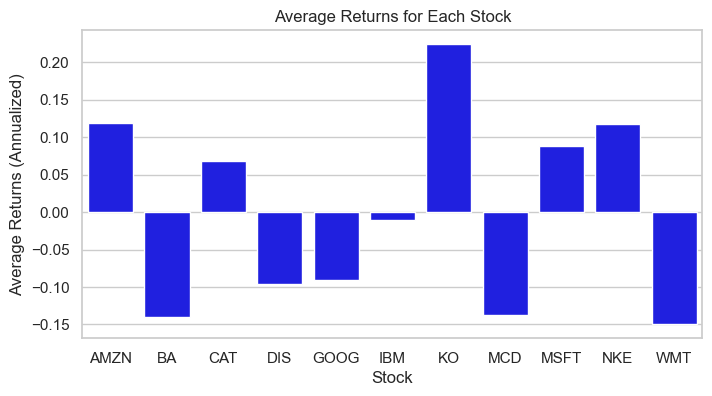

In [379]:
# visualize the average returns
plt.figure(figsize=(8, 4))
sns.set(style='whitegrid')
ax = sns.barplot(x=avg_returns.index, y=avg_returns.values, color='blue')
ax.set(xlabel='Stock', ylabel='Average Returns (Annualized)')
plt.title('Average Returns for Each Stock')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

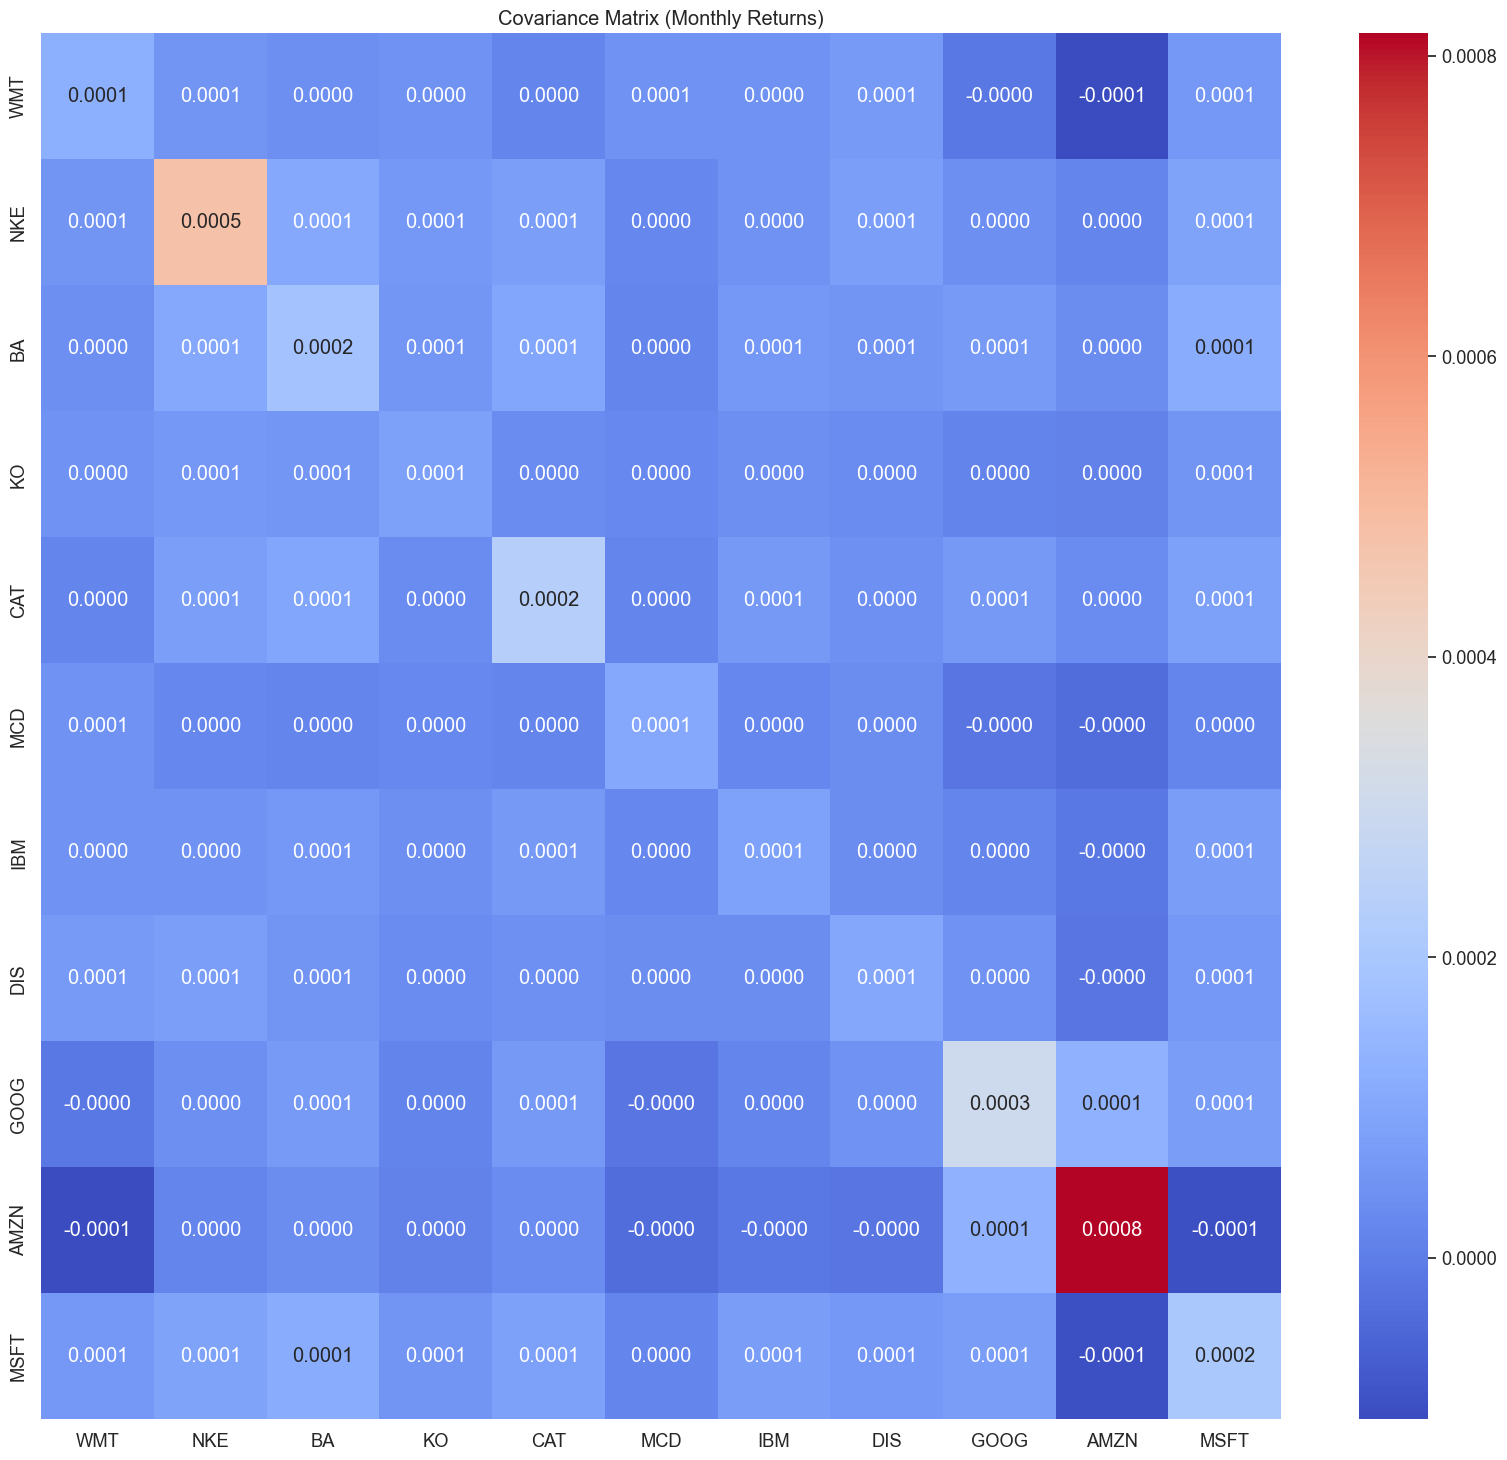

In [380]:
# visualize the covariance matrix
plt.figure(figsize=(20, 18))
sns.set(font_scale=1.2)
sns.heatmap(cov_matrix, cmap='coolwarm', annot=True, fmt=".4f")
plt.title('Covariance Matrix (Monthly Returns)')
plt.show()

#### C) Simulate 50,000 randomly chosen portfolios that put different weights in each of the stocks above and calculate the expected return and standard deviation of those portfolios
 - Note that your weights must sum to 1
 - Store the expected return, standard deviation, and weights for each simulation, as you will need it for later parts

In [382]:
# create a new DataFrame with the daily returns and tickers as columns
df = data.pct_change().dropna()

In [383]:
avg_returns=df.mean()

In [384]:
#daily average returns
avg_returns

AMZN    0.001194
BA      0.000795
CAT     0.000582
DIS     0.000551
GOOG    0.000693
IBM     0.000006
KO      0.000372
MCD     0.000640
MSFT    0.001150
NKE     0.000780
WMT     0.000443
dtype: float64

In [385]:
# simulate 50,000 portfolios
n_portfolios = 50000
results = np.zeros((n_portfolios, 3 + len(tickers)))
for i in range(n_portfolios):
    # generate random weights for each stock
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # ensure weights sum to 1

    # calculate the expected return and standard deviation of the portfolio
    portfolio_return = np.sum(weights * avg_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # store the results in the results array
    results[i, :len(tickers)] = weights
    results[i, len(tickers)] = portfolio_return
    results[i, len(tickers) + 1] = portfolio_std_dev
    results[i, len(tickers) + 2] = results[i, len(tickers)] / results[i, len(tickers) + 1]

# create a DataFrame with the simulation results
columns = tickers + ['return', 'std_dev', 'sharpe_ratio']
results_df = pd.DataFrame(results, columns=columns)

# print the first 5 rows of the results DataFrame
results_df.head()


,WMT,NKE,BA,KO,CAT,MCD,IBM,DIS,GOOG,AMZN,MSFT,return,std_dev,sharpe_ratio
0,0.030130,0.026574,0.082550,0.081353,0.069962,0.162794,0.119333,0.062352,0.139945,0.052359,0.172648,0.000562,0.007481,0.075123
1,0.188392,0.026824,0.033626,0.133830,0.059792,0.159632,0.035850,0.047925,0.105398,0.044933,0.163798,0.000655,0.007109,0.092093
2,0.155646,0.072551,0.046844,0.121284,0.132707,0.077604,0.105850,0.093983,0.039569,0.069312,0.084650,0.000667,0.007321,0.091057
3,0.149294,0.010272,0.170562,0.105270,0.004711,0.194053,0.197564,0.011936,0.018294,0.056332,0.081714,0.000530,0.007076,0.074961
4,0.094197,0.074313,0.110757,0.184401,0.026258,0.183738,0.057635,0.042923,0.078904,0.055454,0.091420,0.000580,0.007122,0.081482


In [386]:
annualized_simulation_df = results_df.copy()
annualized_simulation_df["Expected Annualized Return"] = (1+results_df["return"])**(252) -1
annualized_simulation_df["Expected Annualized Standard Deviation"] = results_df["std_dev"] * np.sqrt(252)
annualized_simulation_df["Volitility"] = results_df["std_dev"] **2


In [387]:
annualized_simulation_df.head()

,WMT,NKE,BA,KO,CAT,MCD,IBM,DIS,GOOG,AMZN,MSFT,return,std_dev,sharpe_ratio,Expected Annualized Return,Expected Annualized Standard Deviation,Volitility
0,0.030130,0.026574,0.082550,0.081353,0.069962,0.162794,0.119333,0.062352,0.139945,0.052359,0.172648,0.000562,0.007481,0.075123,0.152087,0.118751,0.000056
1,0.188392,0.026824,0.033626,0.133830,0.059792,0.159632,0.035850,0.047925,0.105398,0.044933,0.163798,0.000655,0.007109,0.092093,0.179318,0.112858,0.000051
2,0.155646,0.072551,0.046844,0.121284,0.132707,0.077604,0.105850,0.093983,0.039569,0.069312,0.084650,0.000667,0.007321,0.091057,0.182853,0.116213,0.000054
3,0.149294,0.010272,0.170562,0.105270,0.004711,0.194053,0.197564,0.011936,0.018294,0.056332,0.081714,0.000530,0.007076,0.074961,0.142965,0.112323,0.000050
4,0.094197,0.074313,0.110757,0.184401,0.026258,0.183738,0.057635,0.042923,0.078904,0.055454,0.091420,0.000580,0.007122,0.081482,0.157430,0.113062,0.000051


#### D) Graph a scatterplot of the simulated portfolio standard deviation on the x-axis and the simulated portfolio expected return on the y-axis

- Color the graph such that higher Sharpe Ratio portfolios are darker (like in class, assume a risk-free rate of 0 for now)
- Include orange/yellow dots for the location of each individual stock (i.e. 100% weight on stock $i$, 0% on the others)
- Annotate the points on the graph appropriately so each ticker is clearly labeled

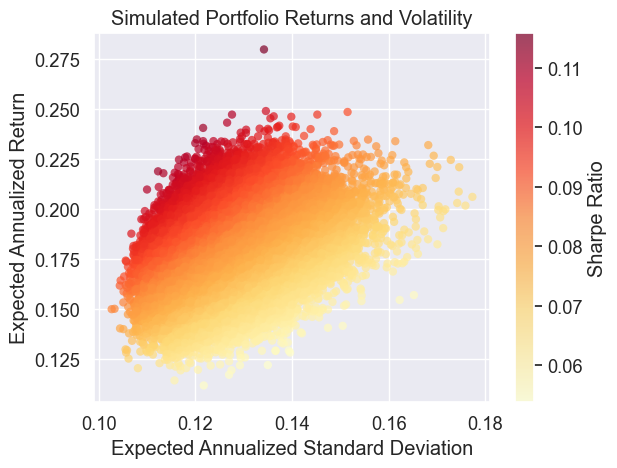

In [388]:
import matplotlib.pyplot as plt

# set up the plot
fig, ax = plt.subplots()

# plot the scatterplot
scatter = ax.scatter(
    x=annualized_simulation_df["Expected Annualized Standard Deviation"], 
    y=annualized_simulation_df["Expected Annualized Return"], 
    c=annualized_simulation_df["sharpe_ratio"], 
    cmap='YlOrRd',
    alpha=0.7,
    edgecolors='none',
)

# add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Sharpe Ratio')

# add orange/yellow dots for individual stocks
for i, ticker in enumerate(tickers):
    weight_mask = (annualized_simulation_df[ticker] == 1)
    x = annualized_simulation_df.loc[weight_mask, "Expected Annualized Standard Deviation"].values
    y = annualized_simulation_df.loc[weight_mask, "Expected Annualized Return"].values
    ax.scatter(
        x=x, 
        y=y, 
        c='orange', 
        alpha=0.7, 
        edgecolors='none', 
        label=ticker,
        s=80
    )

    # annotate the dots
    for j in range(len(x)):
        ax.annotate(ticker, xy=(x[j], y[j]), xytext=(x[j]+0.001, y[j]+0.001))

# set the axis labels and title
ax.set_xlabel('Expected Annualized Standard Deviation')
ax.set_ylabel('Expected Annualized Return')
ax.set_title('Simulated Portfolio Returns and Volatility')

# show the plot
plt.show()


#### E) Find the minimum variance portfolio *in your simulation*
- That is, which one of your 50,000 simulations generated the portfolio with the smallest standard deviation?
- Store and print the weights on each stock that generate this portfolio

In [289]:
# Find the minimum variance portfolio
min_var_portfolio = results_df.iloc[results_df['std_dev'].idxmin()]

# Print the weights of the minimum variance portfolio
print("Weights of minimum variance portfolio:")
for i in range(len(tickers)):
    print("{}: {:.2f}%".format(tickers[i], min_var_portfolio[i] * 100))

Weights of minimum variance portfolio:
WMT: 7.44%
NKE: 2.06%
BA: 3.93%
KO: 24.69%
CAT: 4.90%
MCD: 27.42%
IBM: 10.18%
DIS: 6.39%
GOOG: 6.89%
AMZN: 4.38%
MSFT: 1.71%


#### F) Find the Global Minimum Variance (GMV) portfolio analytically
- That is, not from your simulation. But, what are the weights that generate the lowest possible portfolio standard deviation for these stocks in this time period?
- Store and print the weights of this portfolio.

In [290]:
# calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# calculate the ones vector
ones = np.ones((n_equities, 1))

# calculate the numerator of the weight equation
numerator = np.dot(inv_cov_matrix, ones)

# calculate the denominator of the weight equation
denominator = np.dot(np.dot(ones.T, inv_cov_matrix), ones)

# calculate the weights of the GMV portfolio
gmv_weights = numerator / denominator

# print the weights of the GMV portfolio
print("Weights of Global Minimum Variance portfolio:")
for i in range(len(tickers)):
    print("{}: {:.2f}%".format(tickers[i], gmv_weights[i][0] * 100))

Weights of Global Minimum Variance portfolio:
WMT: 3.64%
NKE: -0.21%
BA: -5.47%
KO: 25.20%
CAT: 2.01%
MCD: 26.65%
IBM: 25.85%
DIS: 9.10%
GOOG: 10.08%
AMZN: 4.99%
MSFT: -1.85%


#### G) Find the portfolio that is efficient but has the same return as AMZN
- Store and print the weights that generate this portfolio

In [291]:
# find the efficient portfolio with the same return as AMZN
target_return = avg_returns['AMZN']
efficient_portfolio = results_df.iloc[((results_df['return']-target_return)**2).argmin()]

In [292]:
# print the weights of the efficient portfolio with the same return as AMZN
print("Weights of efficient portfolio with same return as AMZN:")
for i in range(len(tickers)):
    print("{}: {:.2f}%".format(tickers[i], efficient_portfolio.values[i] * 100))
    

Weights of efficient portfolio with same return as AMZN:
WMT: 2.88%
NKE: 12.77%
BA: 0.22%
KO: 15.78%
CAT: 21.29%
MCD: 0.09%
IBM: 3.66%
DIS: 1.95%
GOOG: 3.88%
AMZN: 21.02%
MSFT: 16.48%


#### H) Finding all efficient portfolios as combinations of two efficient portfolios

Let $X$ and $Y$ be two efficient portfolios. We can find all efficient portfolios through linear combinations of $X$ and $Y$:
- let $\alpha$ be the weight invested in $X$. Define portfolio $Z = \alpha X + (1-\alpha) Y$
- portfolio Z is efficient as long as $E[R_Z] > E[R_{GMV}]$, that is as long as the expected return of Z is greater than the expected return of the GMV portfolio

In this section, you will create linear combinations of the two efficient portfolios you calculated above, the GMV and the efficient portfolio with the same return as AMZN. 

So let $X = $ the efficient portfolio with the same return as AMZN and $Y = $ the GMV portfolio 

- Define a numpy array $alpha$ that takes values from 0 to 3, increments of 0.1

In [293]:
# Set X as the efficient portfolio with the same return as AMZN
target_return = avg_returns['AMZN']
X = results_df.iloc[((results_df['return']-target_return)**2).argmin()].values[:len(tickers)]



In [294]:
# Set Y as the GMV portfolio
Y = gmv_weights.flatten()


In [295]:
# Define an array of alpha values
alphas = np.arange(0, 3.1, 0.1)


- $alpha$ will be the weight on X (the efficient portfolio with the same return as AMZN) and $1-alpha$ will be the weight on Y (the GMV portfolio)
- Create two "empty" lists that will store the expected return and standard deviations of our efficient portfolios
- Implement a for loop that loops through the array $alpha$
- In the for loop:
    - Define a variable $w$ that is equal to $alpha$ multiplied by the weights of X and $1-alpha$ multiplied by the weights of Y
    - Calculate the portfolio expected return and standard deviation of a portfolio with weights $w$
    - If this expected return is greater than the expected return of the GMV portfolio, it is efficient, so store the expected return and standard deviations in the two lists you created before the for loop

- Convert the two lists into numpy arrays for easier operations later

In [296]:
# create an empty numpy array to store the results
results = np.zeros((len(alphas), len(X)+3))



In [297]:
# loop through the alpha values and calculate the weights of portfolio Z
for i, alpha in enumerate(alphas):
    weights = alpha*X + (1-alpha)*Y
    expected_return = np.sum(weights * avg_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = expected_return / portfolio_std_dev
    results[i,:] = np.concatenate((weights, [expected_return, portfolio_std_dev, sharpe_ratio]))


In [298]:
# create a DataFrame with the simulation results
columns = ['weight_'+str(i+1) for i in range(len(X))] + ['return', 'std_dev', 'sharpe_ratio']
results_df = pd.DataFrame(results, columns=columns)


In [299]:
# find the efficient frontier
gmv_return = results_df['return'].min()
efficient_frontier = results_df[results_df['return'] >= gmv_return]

# print the efficient frontier
#print("Efficient Frontier:")
# efficient_frontier


#### I) Make a scatterplot of all the portfolios you created in this problem:
- The simulated portfolios (color weighted by their Sharpe Ratio)
- The individual tickers in a different color (annotated appropriately)
- The GMV portfolio (as a red square)
- The efficient portfolio with the same return as AMZN (as a blue dot)
- All the efficient portfolios you found in the part H (as a red X)

The x-axis is standard deviation and y-axis is expected return

# Question 2 - Expected Shortfall and Value at Risk

Calculate the 1%VaR and 1%ES for the U.S. stock market using monthly data for returns on the market portfolio from the Fama-French data website.

1. Use Pandas DataReader to extract the 'F-F_Research_Data_Factors' dataset and keep only the monthly data (we want the entire time series)
2. Calculate the market return each month (i.e. add the "Rm-rf" column with the "RF" column)
3. What is the 1% VaR of the market return?
4. Print the observations that are less than the 1% VaR
5. What is the 1% ES of the market return?


In [300]:
import urllib.request
import pandas_datareader.data as web
import ssl
import zipfile

In [301]:
# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context


In [302]:
# Define start and end dates
start_date = '1926-07-01'
end_date = '2022-12-31'


In [303]:
# Define the data source and the ticker symbol for the Fama-French data
data_source = 'famafrench'
tickers = ['F-F_Research_Data_Factors']

# Convert tickers list to string
tickers_str = ','.join(tickers)

# Extract the data using Pandas DataReader
ff_data = web.DataReader(tickers_str, data_source, start=start_date, end=end_date)[0]

# Convert index to string
ff_data.index = ff_data.index.astype(str)

# Keep only the monthly data
ff_data = ff_data[ff_data.index.str.endswith('01')]

# Rename the columns
ff_data = ff_data.rename(columns={'Mkt-RF': 'MKT', 'RF': 'RF', 'SMB': 'SMB', 'HML': 'HML'})

# Filter the dataframe to only include data within the start and end dates
ff_data = ff_data.loc[start_date:end_date]



In [304]:
# Rename the columns
ff_data = ff_data.rename(columns={'MKT-RF': 'MKT', 'RF': 'RF', 'SMB': 'SMB', 'HML': 'HML'})

# Calculate market return each month
ff_data['MKT_return'] = ff_data['MKT'] + ff_data['RF']

In [305]:
ff_data.head()

,MKT,SMB,HML,RF,MKT_return
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.19
1928-01,-0.68,4.26,-0.75,0.25,-0.43
1929-01,4.66,-3.56,-1.24,0.34,5.00
1930-01,5.61,3.55,-0.96,0.14,5.75
1931-01,6.24,3.45,7.12,0.15,6.39


In [306]:
# Calculate the 1% VaR and 1% ES of the market return
var_1pct = ff_data['MKT_return'].quantile(0.01)
es_1pct = ff_data['MKT_return'][ff_data['MKT_return'] <= var_1pct].mean()


In [307]:
# Print the observations that are less than the 1% VaR
print("Observations that are less than the 1% VaR:")
print(ff_data[ff_data['MKT_return'] <= var_1pct])

# Print the 1% VaR and 1% ES
print("1% VaR of the market return:", var_1pct)
print("1% ES of the market return:", es_1pct)

Observations that are less than the 1% VaR:
          MKT   SMB    HML   RF  MKT_return
Date                                       
2009-01 -8.12  0.08 -11.29  0.0       -8.12
1% VaR of the market return: -7.531
1% ES of the market return: -8.12


# Question 3

In this question, you will calculate the $alpha$ from a 3-factor regression for each stock in the ticker list from Q1 and assess if any are statistically significant. Specifically the regression you will run for each stock is:

$$ R_i^e = \alpha_i + \beta_{i,m} R_m^e + \beta_{i,SMB} R_{SMB} + \beta_{i,HML} R_{HML} + e_i $$
- $R_i^e$ is stock excess return
- $R_m^e$ is market excess return
- $R_{SMB}$ is the excess return of the Small minus Big portfolio (firm size)
- $R_{HML}$ is the excess return of the High minus Low portfolio (B/M ratio)

- Excess returns are defined as the return minus the risk-free rate

The sample period for the regression is the same as Question 1 (2014-2019).

Follow these general steps:
1. Merge the monthly returns from the tickers in Question 1 with the FamaFrench data in Question 2
2. Calculate the excess returns of each stock in each month of the sample
3. Calculate the 3-factor alpha for each stock by running the above regression for each stock. Store the alpha and the p-value.
4. Which stocks (if any) have a statistically significant alpha at the 5% level?

In [308]:
# Define start and end dates
start_date = datetime.datetime(1926, 7, 1)
end_date = datetime.datetime(2022, 12, 31)

# Define the data source and the ticker symbol for the Fama-French data
data_source = 'famafrench'
tickers = ['F-F_Research_Data_Factors']

# Convert tickers list to string
tickers_str = ','.join(tickers)

# Extract the data using Pandas DataReader
ff_data = web.DataReader(tickers_str, data_source, start=start_date, end=end_date)[0]


ff_data.index = pd.to_datetime(ff_data.index.to_timestamp().strftime('%Y-%m-%d'))


# Rename the columns
ff_data = ff_data.rename(columns={'Mkt-RF': 'MKT', 'RF': 'RF', 'SMB': 'SMB', 'HML': 'HML'})

# Calculate market return each month
ff_data['MKT_return'] = ff_data['MKT'] + ff_data['RF']

# Keep only the monthly data
ff_data = ff_data.resample('M').last()

# Filter the dataframe to only include data within the start and end dates
ff_data = ff_data.loc[start_date:end_date]

In [309]:
ff_data.tail()


,MKT,SMB,HML,RF,MKT_return
Date,,,,,
2022-08-31,-3.77,1.37,0.30,0.19,-3.58
2022-09-30,-9.35,-0.79,0.06,0.19,-9.16
2022-10-31,7.83,0.09,8.05,0.23,8.06
2022-11-30,4.60,-3.40,1.38,0.29,4.89
2022-12-31,-6.41,-0.68,1.32,0.33,-6.08


In [310]:
# calculate the monthly returns
monthly_returns_3 = data.pct_change().resample('M').agg(lambda x: x[-1]).dropna()


In [311]:
monthly_returns_3 = monthly_returns_3.multiply(100)


In [312]:
monthly_returns_3.head()

,AMZN,BA,CAT,DIS,GOOG,IBM,KO,MCD,MSFT,NKE,WMT
Date,,,,,,,,,,,
2014-01-31,-10.997244,-1.003695,0.761788,-0.833107,4.014485,-0.383400,-0.916935,0.394441,2.658712,-1.474134,-0.093645
2014-02-28,0.547021,0.280046,0.279203,0.410038,-0.291990,-0.053935,0.341467,0.073608,1.188589,0.358908,0.187748
2014-03-31,-0.567553,0.827575,-0.020121,1.367263,-0.539297,1.071139,-0.744527,0.812407,1.712174,0.435141,0.552533
2014-04-30,1.248419,0.506377,0.094978,0.890128,-0.197079,0.697055,0.542228,-0.118226,-0.271508,0.648449,0.050216
2014-05-31,-0.391998,0.081380,-1.322385,-0.023805,-0.033923,0.326543,0.614903,0.088837,1.487420,0.693892,1.039739


In [313]:
# Merge the two dataframes on their index
merged_data = pd.merge(monthly_returns_3, ff_data, left_index=True, right_index=True)


In [314]:
merged_data.head()

,AMZN,BA,CAT,DIS,GOOG,IBM,KO,MCD,MSFT,NKE,WMT,MKT,SMB,HML,RF,MKT_return
Date,,,,,,,,,,,,,,,,
2014-01-31,-10.997244,-1.003695,0.761788,-0.833107,4.014485,-0.383400,-0.916935,0.394441,2.658712,-1.474134,-0.093645,-3.32,0.90,-2.07,0.0,-3.32
2014-02-28,0.547021,0.280046,0.279203,0.410038,-0.291990,-0.053935,0.341467,0.073608,1.188589,0.358908,0.187748,4.65,0.37,-0.31,0.0,4.65
2014-03-31,-0.567553,0.827575,-0.020121,1.367263,-0.539297,1.071139,-0.744527,0.812407,1.712174,0.435141,0.552533,0.43,-1.85,4.93,0.0,0.43
2014-04-30,1.248419,0.506377,0.094978,0.890128,-0.197079,0.697055,0.542228,-0.118226,-0.271508,0.648449,0.050216,-0.19,-4.20,1.17,0.0,-0.19
2014-05-31,-0.391998,0.081380,-1.322385,-0.023805,-0.033923,0.326543,0.614903,0.088837,1.487420,0.693892,1.039739,2.06,-1.88,-0.13,0.0,2.06


In [315]:
# Calculate the excess returns for each stock
excess_returns = merged_data.iloc[:, :-3].sub(merged_data['RF'], axis=0)


In [316]:
# Initialize empty lists to store alpha and p-value for each stock
alpha_list = []
pval_list = []


In [317]:
# Loop through each stock to calculate the 3-factor alpha
for stock in excess_returns.columns:
    # Define the independent variables
    X = merged_data[['MKT_return', 'SMB', 'HML']]
    
    # Define the dependent variable
    y = excess_returns[stock]
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    
    # Extract the alpha and p-value
    alpha = model.params['const']
    pval = model.pvalues['const']
    
    # Append the alpha and p-value to the lists
    alpha_list.append(alpha)
    pval_list.append(pval)

In [318]:
# Create a new dataframe to store the results
results4 = pd.DataFrame({
    'Stock': excess_returns.columns,
    'Alpha': alpha_list,
    'P-Value': pval_list
})


In [319]:
results4

,Stock,Alpha,P-Value
0,AMZN,0.002652,9.942038e-01
1,BA,-0.242245,1.500502e-01
2,CAT,0.019475,9.188009e-01
3,DIS,-0.077520,5.398787e-01
4,GOOG,-0.047795,8.206808e-01
5,IBM,-0.101795,3.785927e-01
6,KO,0.002894,9.791939e-01
7,MCD,-0.174490,1.766427e-01
8,MSFT,0.058922,7.418631e-01
9,NKE,-0.005903,9.830876e-01


In [320]:
# Check which stocks have a statistically significant alpha at the 5% level
significant_stocks = results4[results4['P-Value'] < 0.05]['Stock'].tolist()
print('Stocks with statistically significant alpha at the 5% level:', significant_stocks)


Stocks with statistically significant alpha at the 5% level: ['MKT', 'SMB']


# Question 4

In this question, you will price what is called an Asian option using a method similar to what we used in Lecture 8 to price a barrier option. 

In a traditional option, the stock price on the last day of maturity is used to determine the value of the option. In Asian option, instead, it is the *average* of the stock price over a pre-determined set of days that is then used to determine the value of the option.

For example, suppose you have an Asian call option with strike price of 100, avgdays=[150,200,300], and maturity of T=365 days. The value of the option is determined by the *average* price of the stock on days 150, 200, and 300 (instead of the price of the stock on day 365 like in a traditional option). So suppose the price of the stock on day150 was \\$110, on day200 was \\$120, and on day300 was \\$130. The average price on these 3 days is \\$120. Therefore, at maturity, the value of the option is worth \\$20 (average price of \\$120 minus the strike price of \\$100). If the average price is less than the strike, then the call option is worthless.

Complete the below function _asian_option_price()_

The inputs to the function along with their default values are given and described in the comment.


The function should return the price of the Asian option today (so take the present value of the payoff at maturity, like in class).

I've outlined some general steps the function could take in the comments

In [321]:
from scipy.stats import norm

In [322]:
def asian_option_price(avgdates, r=.05, sigma=.2, T=1, S0=100,
                       numsim=10000, K=110):

    # Define numsteps, dt, and drift
    numsteps = max(avgdates) + 1 if max(avgdates) + 1 > 253 else 253
    dt = T/numsteps
    drift = np.exp((r - 0.5*sigma**2)*dt)

    # Generate brownian motion "noise"
    noise = norm.rvs(size=(numsteps, numsim))

    # Simulate the stock price paths
    S = np.zeros((numsteps+1, numsim))
    S[0] = S0
    for t in range(1, numsteps+1):
        S[t] = S[t-1]*drift*np.exp(sigma*np.sqrt(dt)*noise[t-1])

    # Calculate the average price of the stock for the days in avgdates
    avgS = np.mean(S[avgdates], axis=0)

    # Find the value of the option at maturity
    payoff = avgS - K
    payoff[payoff < 0] = 0
    optionvalue = np.exp(-r*T)*payoff

    # Take the present value of that to bring to t=0
    asian_option_price = np.mean(optionvalue)

    # Return the price
    return asian_option_price

In [323]:
avgdates = [150, 200, 300]
r = 0.05
sigma = 0.2
T = 1
S0 = 100
numsim = 10000
K = 100

asian_call_price = asian_option_price(avgdates, r=r, sigma=sigma, T=T, S0=S0, numsim=numsim, K=K)

print("Option Call Price: ", asian_call_price)

Option Call Price:  7.780817171642021
